**<ins>Introduction</ins>**
==

**<ins>Methods & Results</ins>**
==

In [1]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(RColorBrewer)
library(gridExtra)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [3]:
players_url <- "https://raw.githubusercontent.com/Alonso181006/Individual-Project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/Alonso181006/Individual-Project/refs/heads/main/sessions.csv"
players_data <- read_csv(players_url)
sessions_data <- read_csv(sessions_url)
players_data <- players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashed_email, name, gender
dbl (2): played_hours, age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`summarise()` has grouped output by 'rank'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'rank'. You can override using the
`.groups` argument.


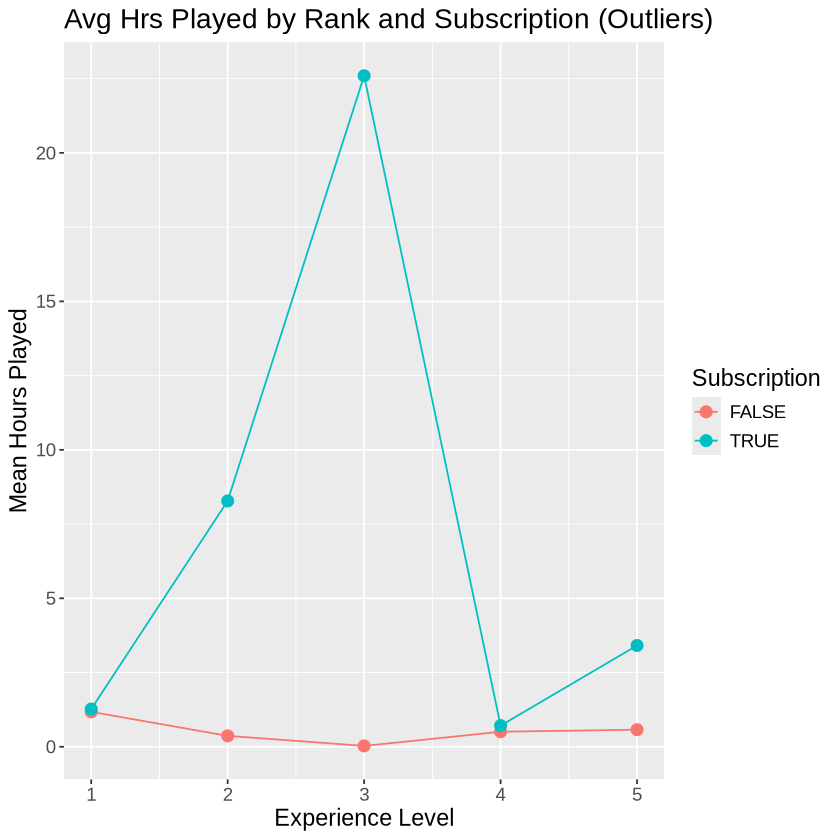

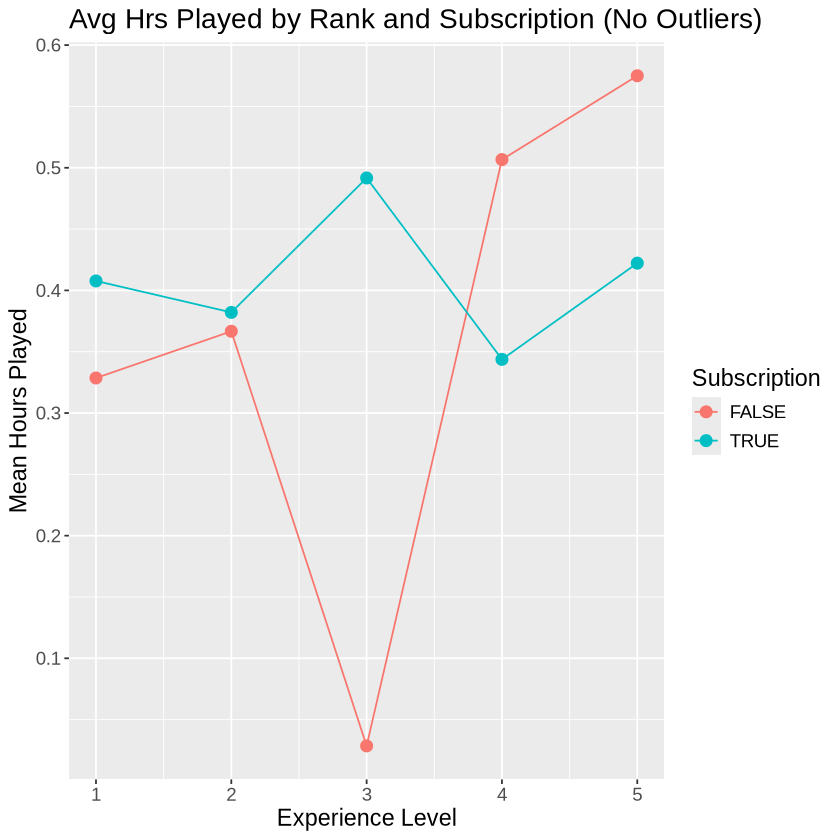

In [4]:
# Wrangling Data for the Plot
players_data_ranks <- players_data |>
    mutate(rank = as.integer(factor(experience, 
                                      levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))))

# Finding average played hours based on rank and subscription
players_data_avg_hours <- players_data_ranks |>
  group_by(rank, subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ungroup()

# Visualize average hours against experience level
players_plot_outliers <- players_data_avg_hours |>
    ggplot(aes(x = rank, y = mean_hours, color = subscribe)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Experience Level", y = "Mean Hours Played", color = "Subscription", title = "Avg Hrs Played by Rank and Subscription (Outliers)") +
    theme(text = element_text(size = 14))
players_plot_outliers

# Remove Outliers
players_data_low_hours <- players_data_ranks |>
    filter(played_hours < 5)

# Finding average played hours based on rank and subscription without outliers
players_data_avg_low_hours <- players_data_low_hours |>
  group_by(rank, subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ungroup()

# Visualize average hours against experience level
players_plot_no_outliers <- players_data_avg_low_hours |>
    ggplot(aes(x = rank, y = mean_hours, color = subscribe)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Experience Level", y = "Mean Hours Played", color = "Subscription", title = "Avg Hrs Played by Rank and Subscription (No Outliers)") +
    theme(text = element_text(size = 14))
players_plot_no_outliers

**<ins>Discussion</ins>**
==

**<ins>References</ins>**
==